# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.info())
# np.sum(df.isnull()) #checking for missing values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. there are missing values present in 'Age' colomn, and 'Cabin' colomn. So we need to deal with it.
Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80.

# Data Preprocessing

### Missing Values

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
percent = missing/891*100
missing_data = pd.concat([missing, percent], axis=1, keys=['Total Missing', '%'])
missing_data.head(5)

,Total Missing,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


We can see that only cabin, Age and Embarked contains missing values. Embarked is easiest to deal with, we can fill the missing values.
Age is a little bit tricky,
Most probably we need to drop 'Cabin', because 77% data is missing

##  What features could contribute to a high survival rate ?

Definetely, 'PassengerId', 'Name' and 'Ticket' will not contribute any thing in the survival rate.

## Data Visualization

### 1. Age and Sex

Lets check how age and Sex is correlated with survival rate. For this, we first make plot for Males of all ages, and then Females. 

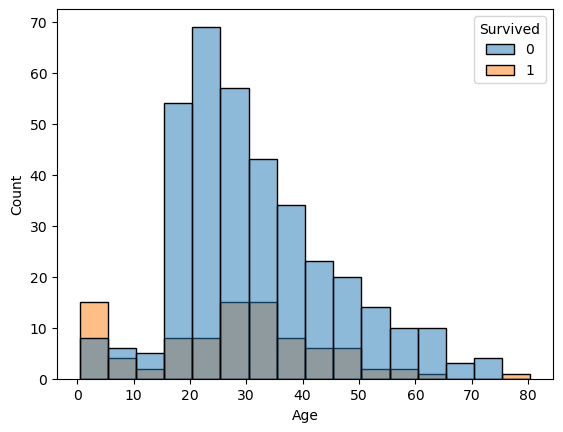

In [7]:
Male = df[ df['Sex'] == 'male']
Female = df[ df['Sex'] == 'female']
sns.histplot(x = "Age",data = Male, hue = 'Survived', binwidth=5)
plt.show()

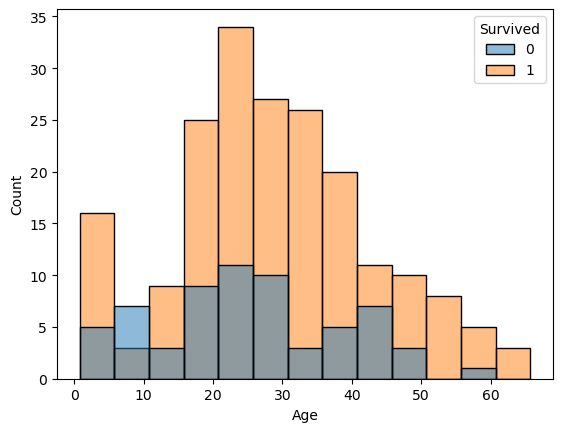

In [8]:
sns.histplot(x = "Age",data = Female, hue = 'Survived', binwidth= 5)
plt.show()

Here, we can see that females' survival rate is more than mens, and between Age 15 to 40 years, survival rate is very high

### 2. Pclass and Fare

I think that, Fare is realated to Pclass and Pclass is somehow related to survival rate. Let's verify our assumptions.

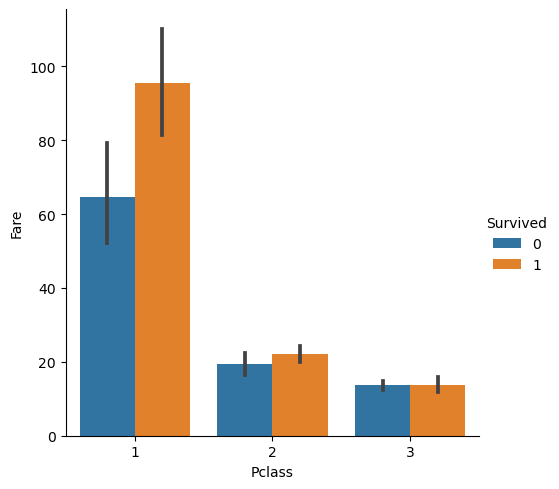

In [9]:
sns.catplot(x='Pclass', y = 'Fare', data = df, kind='bar', hue='Survived' )

Let's, check if fare is related to embarked or cabin

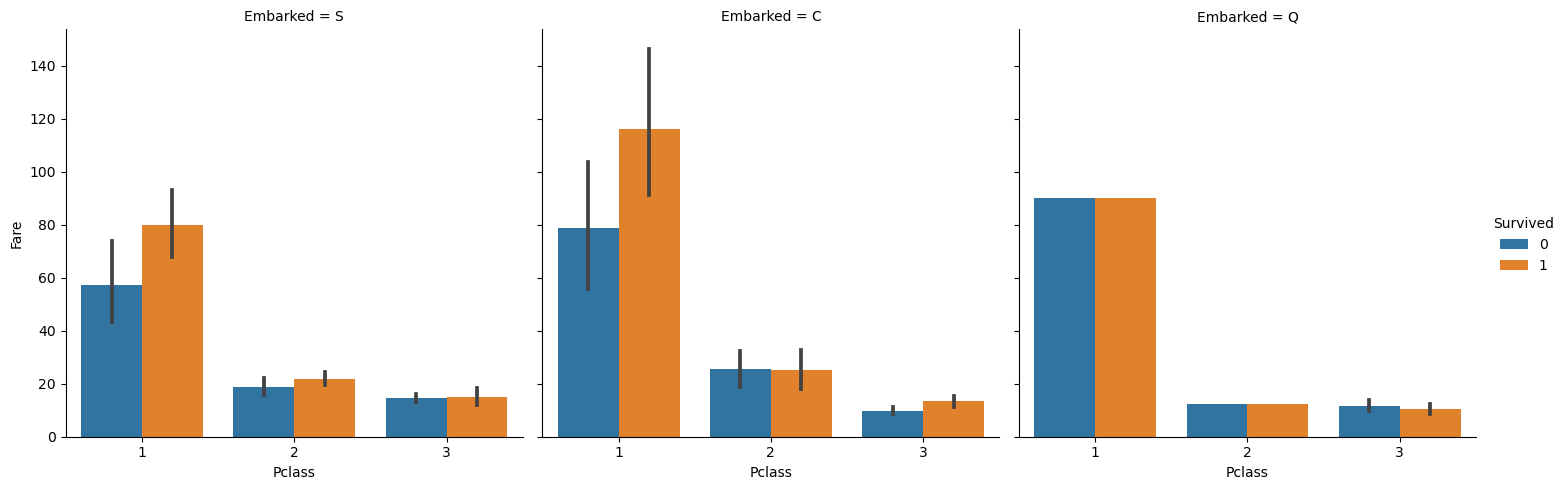

In [10]:
# g = sns.FacetGrid(row = None, col='Embarked', data = df)
# g.map(sns.barplot,x='Pclass', y = 'Fare', data = df, hue='Survived')
sns.catplot(x='Pclass', y = 'Fare', data = df, col='Embarked', kind='bar', hue='Survived' )

We can confirm that, Fare is not related to Embarked in any way, but at Embarked port 'C' is at higher survival rates.

### 3. Fare and cabin

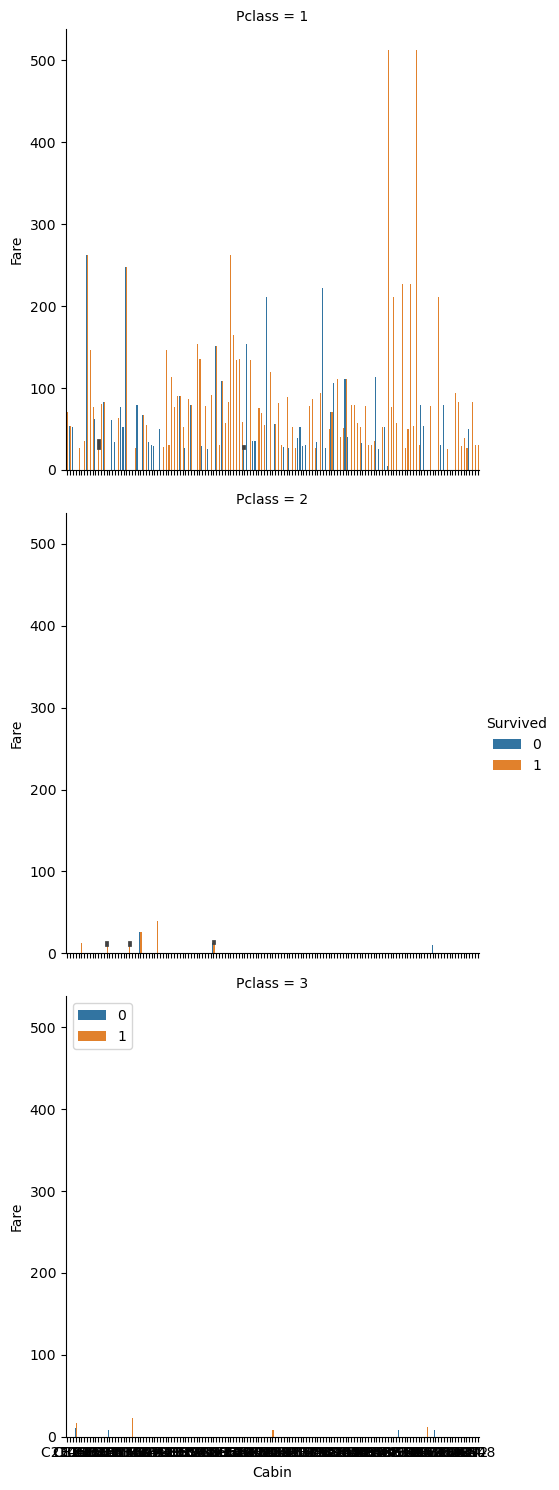

In [11]:
# sns.histplot(x='Cabin', y='Survived', data = df)
sns.catplot(x='Cabin', y = 'Fare', data = df, row='Pclass', kind='bar', hue='Survived')
plt.legend()

We can confirm that Cabin number is not related with the Fare

### 4. Embarked and Sex

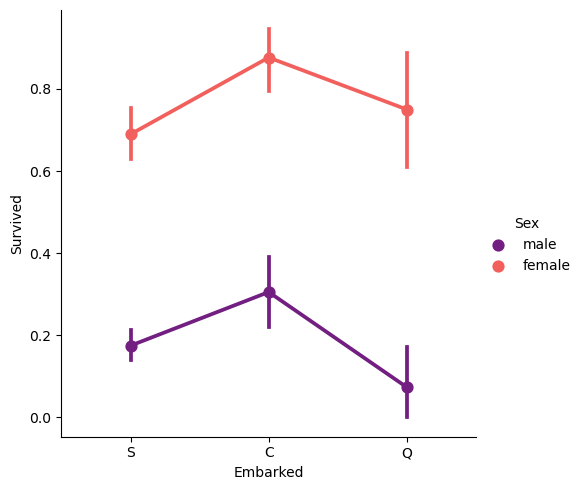

In [12]:
sns.catplot(x='Embarked', y='Survived', data =df, hue='Sex', kind = 'point', order = ['S', 'C', 'Q'], palette='magma')

Females, have higher survival rate at C port, and ofcourse, they have higher survival rate than Males

### 5. Sibs and Parch

Since, Sibs and Parch are relatives, so it would make more sence if we combine them into one feature and then analyse.

In [13]:
# df['Relatives'] = df['SibSp'].add(df['Parch'])
df['Relatives'] = df['SibSp'] + df['Parch']
test['Relatives'] = test['SibSp'] + test['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: xlabel='Relatives', ylabel='Survived'>

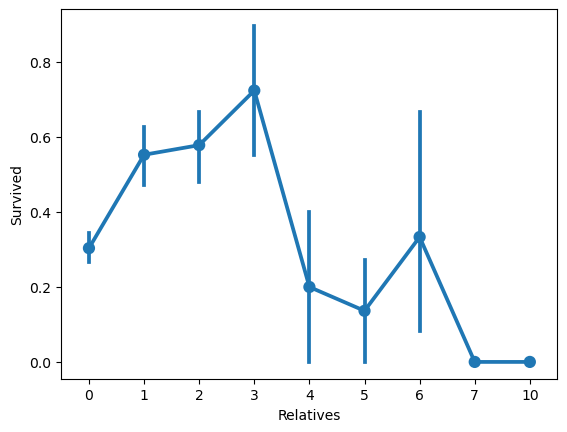

In [14]:
sns.pointplot(x='Relatives', y='Survived', data=df)

Here we can see that a person have, high survival probability with 1 to 3 relatives, but lower if relatives are less than one or more than four (Except 6)

#### Conclusion:

1. Survival probability of Females are Higher than males
2. Peoples between age 15 to 45, have higher Survival probability than others (Expect children between 0-5 years)
3. Pclass 1 have higher survival probability than other two classes, and class 3 have lowest chance of survival, and this is related with Fare, i.e., people, who spent higher Fare, have higher Survival probability.
4. Embarked 'C' have higher Survival Probability than other two
5. Peoples with number of relatives between 1 to 3 have higher chance of survival than people with no relatives, and people with relatives more than or equal to 4, except peoples with 6 relatives
6. PassengerId, Name, and Ticket is not contributing in Survival chance.

### Now, Lets Prepare data for Model training

We need to move survived colum to last

In [15]:
df = df[[c for c in df if c not in ['Survived']] + ['Survived']] # moving survived columns in last
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


Dropping PassengerId, Name and Ticket from train data, but we will not drop PassengerId from test data since it is required for submission

In [16]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)
test = test.drop(['Name','Ticket'], axis=1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,1,0
1,1,female,38.0,1,0,71.2833,C85,C,1,1
2,3,female,26.0,0,0,7.9250,NaN,S,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,1
4,3,male,35.0,0,0,8.0500,NaN,S,0,0


### Missing values

1. Cabin: We can drop Cabin since more than 70% values are missing, but Cabin number may play important role in survival based on its location. So, we will extract some valuable information from it. We will see it in other versions of this notebook.

In [17]:
df = df.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

2. Age: 177 age values are missing. we will fill missing values with random numbers, which are between mean+-std.

In [18]:
Age_mean = df['Age'].mean()
Age_std  = df['Age'].std()
# np.random.seed(0)  # Setting random state 0, for same results
# Age_fill = np.random.randint((Age_mean-Age_std), (Age_mean+Age_std), size = (177))
# Age_fill = pd.Series(Age_fill)
df['Age'] = df['Age'].fillna(Age_mean)
df['Age'].isnull().sum()

0

In [19]:
Age_mean = test['Age'].mean()
test['Age'] = test['Age'].fillna(Age_mean)
test['Age'].isnull().sum()

0

3. Filling emabrked with most repeated value, i.e. mode

In [20]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
Embarked_fill = 'S'
df['Embarked'] = df['Embarked'].fillna(Embarked_fill)
df['Embarked'].isnull().sum()

0

4. One Fare value is missing in tet data set, we will fill it with 0

In [22]:
test['Fare'] = test['Fare'].fillna(0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    object 
 2   Age        891 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   Embarked   891 non-null    object 
 7   Relatives  891 non-null    int64  
 8   Survived   891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Relatives    418 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


We have dealt with missing values, Now, lets do feature extraction and conversion

### Feature Extraction and Conversion

Covert Age and Fare to int from float

In [25]:
df['Age'] = df['Age'].astype('int64')
df['Fare'] = df['Fare'].astype('int64')
test['Age'] = test['Age'].astype('int64')
test['Fare'] = test['Fare'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pclass     891 non-null    int64 
 1   Sex        891 non-null    object
 2   Age        891 non-null    int64 
 3   SibSp      891 non-null    int64 
 4   Parch      891 non-null    int64 
 5   Fare       891 non-null    int64 
 6   Embarked   891 non-null    object
 7   Relatives  891 non-null    int64 
 8   Survived   891 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 62.8+ KB


Convert Sex and Embarked into numeric

In [26]:
df['Sex'].replace({'male':0, 'female':1}, inplace=True) #
test['Sex'].replace({'male':0, 'female':1}, inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
# df = pd.get_dummies(df, columns = ['Embarked'])
df.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Survived
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,1,1
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,1,1
4,3,0,35,0,0,8,0,0,0
5,3,0,29,0,0,8,2,0,0
6,1,0,54,0,0,51,0,0,0
7,3,0,2,3,1,21,0,4,0
8,3,1,27,0,2,11,0,2,1
9,2,1,14,1,0,30,1,1,1


Convert Sex and Embarked into numeric: Test data

In [27]:
# test = pd.get_dummies(test, columns = ['Embarked'])
test.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,892,3,0,34,0,0,7,2,0
1,893,3,1,47,1,0,7,0,1
2,894,2,0,62,0,0,9,2,0
3,895,3,0,27,0,0,8,0,0
4,896,3,1,22,1,1,12,0,2
5,897,3,0,14,0,0,9,0,0
6,898,3,1,30,0,0,7,2,0
7,899,2,0,26,1,1,29,0,2
8,900,3,1,18,0,0,7,1,0
9,901,3,0,21,2,0,24,0,2


Dropping Sibs, Parch, Sex_male, Embarked_Q since we already have Relatives

In [28]:
df = df.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)
df.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Survived
0,3,0,22,7,0,1,0
1,1,1,38,71,1,1,1
2,3,1,26,7,0,0,1
3,1,1,35,53,0,1,1
4,3,0,35,8,0,0,0


##### Now, let's create categories for features

1. Lets create Age group:
[0-5]: 0; [5-15]: 1; [15-20]: 2; [20-25]: 3; [25-30]: 4; [30-35]:5; [35-40]:6; [40-45]:7; [45 - 60]:8; [60-80]:9

In [29]:
df.loc[(df.Age<=5), 'Age']=0
df.loc[((df.Age>5) & (df.Age<=15)), 'Age']=.375
df.loc[((df.Age>15) & (df.Age<=20)), 'Age']=.750
df.loc[((df.Age>20) & (df.Age<=25)), 'Age']=1.125
df.loc[((df.Age>25) & (df.Age<=30)), 'Age']=1.5
df.loc[((df.Age>30) & (df.Age<=35)), 'Age']=1.875
df.loc[((df.Age>35) & (df.Age<=40)), 'Age']=2.25
df.loc[((df.Age>40) & (df.Age<=45)), 'Age']=2.625
df.loc[((df.Age>45) & (df.Age<=60)), 'Age']=3
df.loc[(df.Age>60), 'Age']=3.375
df.head()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Survived
0,3,0,1.125,7,0,1,0
1,1,1,2.250,71,1,1,1
2,3,1,1.500,7,0,0,1
3,1,1,1.875,53,0,1,1
4,3,0,1.875,8,0,0,0


In [30]:
test.loc[(test.Age<=5), 'Age']=0
test.loc[((test.Age>5) & (test.Age<=15)), 'Age']=.375
test.loc[((test.Age>15) & (test.Age<=20)), 'Age']=.750
test.loc[((test.Age>20) & (test.Age<=25)), 'Age']=1.125
test.loc[((test.Age>25) & (test.Age<=30)), 'Age']=1.5
test.loc[((test.Age>30) & (test.Age<=35)), 'Age']=1.875
test.loc[((test.Age>35) & (test.Age<=40)), 'Age']=2.25
test.loc[((test.Age>40) & (test.Age<=45)), 'Age']=2.625
test.loc[((test.Age>45) & (test.Age<=60)), 'Age']=3
test.loc[(test.Age>60), 'Age']=3.375

In [31]:
# Fare Categories
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = .6
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 1.2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 1.8
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 2.4
df.loc[ df['Fare'] > 250, 'Fare'] = 3
# df.head()
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = .6
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 1.2
test.loc[(test['Fare'] > 31) & (test['Fare'] <= 99), 'Fare']   = 1.8
test.loc[(test['Fare'] > 99) & (test['Fare'] <= 250), 'Fare']   = 2.4
test.loc[ test['Fare'] > 250, 'Fare'] = 3
test.head()
# dataset = [df,test]
# for dataset in data:
#     dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Relatives']+1)
#     dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
df.head(10)

,Pclass,Sex,Age,Fare,Embarked,Relatives,Survived
0,3,0,1.125,0.0,0,1,0
1,1,1,2.250,1.8,1,1,1
2,3,1,1.500,0.0,0,0,1
3,1,1,1.875,1.8,0,1,1
4,3,0,1.875,0.6,0,0,0
5,3,0,1.500,0.6,2,0,0
6,1,0,3.000,1.8,0,0,0
7,3,0,0.000,1.2,0,4,0
8,3,1,1.500,0.6,0,2,1
9,2,1,0.375,1.2,1,1,1


In [32]:
df['Fare'].value_counts()

0.0    241
1.2    223
0.6    216
1.8    158
2.4     44
3.0      9
Name: Fare, dtype: int64

# Train Test split

In [33]:
X = df.iloc[:,:-1].values  #numpy.ndarray
Y = df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=0)

**Feature Scaling**

In [35]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:,2:3] = sc.fit_transform(X_train[:,2:3])
# X_train[1:100,:]
# Not good in this case

# Model Training

## 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[94 16]
 [18 51]]
Accuracy on Test data 81.01 %
Accuracy on Train data 79.21 %


## 2. KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[95 15]
 [20 49]]
Accuracy on Test data 80.45 %
Accuracy on Train data 83.43 %


## 3. Linear SVM

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[92 18]
 [20 49]]
Accuracy on Test data 78.77 %
Accuracy on Train data 78.65 %


## 4. Kernal SVM

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[96 14]
 [22 47]]
Accuracy on Test data 79.89 %
Accuracy on Train data 83.15 %


## 5. Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = GaussianNB()
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[91 19]
 [11 58]]
Accuracy on Test data 83.24 %
Accuracy on Train data 76.4 %


## 6. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[96 14]
 [17 52]]
Accuracy on Test data 82.68 %
Accuracy on Train data 89.89 %


## 7. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0)
classifier.fit(X_train, Y_train) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X_train, Y_train)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")

[[100  10]
 [ 17  52]]
Accuracy on Test data 84.92 %
Accuracy on Train data 89.61 %


#### Random Forest gives highest accuracy, so we will select it and train model on full data

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=0, oob_score=True)
classifier.fit(X, Y) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X, Y)
acc_train = round(classifier.score(X, Y) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")
print("oob score:", round(classifier.oob_score, 4)*100, "%")

[[105   5]
 [ 11  58]]
Accuracy on Test data 91.06 %
Accuracy on Train data 90.12 %
oob score: 100 %


#### Hyperparameter Tuning

In [44]:
param_grid = {
'n_estimators': [25, 50, 100, 150],
'max_features': ['sqrt', 'log2', None],
'max_depth': [3, 6, 9],
'max_leaf_nodes': [3, 6, 9],
}


In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X, Y)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)


In [46]:
#Updating Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = RandomForestClassifier(max_depth=6, max_leaf_nodes=9,
                       n_estimators=25, random_state=0, oob_score=True)
classifier.fit(X, Y) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X, Y)
acc_train = round(classifier.score(X_train, Y_train) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")
print("oob score:", round(classifier.oob_score, 4)*100, "%")

[[105   5]
 [ 22  47]]
Accuracy on Test data 84.92 %
Accuracy on Train data 83.29 %
oob score: 100 %


In [47]:
random_search = RandomizedSearchCV(RandomForestClassifier(),param_grid, random_state=0)
random_search.fit(X, Y)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_leaf_nodes=6, n_estimators=150)


In [48]:
#Updating Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=6,
                       n_estimators=25, random_state=0, oob_score=True)
classifier.fit(X, Y) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X, Y)
acc_train = round(classifier.score(X, Y) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")
print("oob score:", round(classifier.oob_score, 4)*100, "%")

[[97 13]
 [18 51]]
Accuracy on Test data 82.68 %
Accuracy on Train data 82.72 %
oob score: 100 %


From above two Methods, we can see that default case Accuracy is higher than these two, but to avoid overfitting we will select last model

**FINAL MODEL**

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=0, oob_score=True)
classifier.fit(X, Y) #training model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print("Accuracy on Test data",round(accuracy_score(Y_test, y_pred)*100,2),"%")
classifier.score(X, Y)
acc_train = round(classifier.score(X, Y) * 100, 2)
print("Accuracy on Train data",round(acc_train,2,), "%")
print("oob score:", round(classifier.oob_score, 4)*100, "%")

[[105   5]
 [ 12  57]]
Accuracy on Test data 90.5 %
Accuracy on Train data 89.9 %
oob score: 100 %


# Test data prediction

In [50]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Relatives
0,892,3,0,1.875,0.0,2,0
1,893,3,1,3.000,0.0,0,1
2,894,2,0,3.375,0.6,2,0
3,895,3,0,1.500,0.6,0,0
4,896,3,1,1.125,0.6,0,2


In [51]:
test_X = test.iloc[:,1:].values #dropping passengerId for prediction
test_Y = classifier.predict(test_X)

In [52]:
test['Survived'] = test_Y
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Relatives,Survived
0,892,3,0,1.875,0.0,2,0,0
1,893,3,1,3.000,0.0,0,1,0
2,894,2,0,3.375,0.6,2,0,0
3,895,3,0,1.500,0.6,0,0,0
4,896,3,1,1.125,0.6,0,2,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1.500,0.6,0,0,0
414,1306,1,1,2.250,2.4,1,0,1
415,1307,3,0,2.250,0.0,0,0,0
416,1308,3,0,1.500,0.6,0,0,0


In [53]:
submission = test.drop(['Pclass','Sex','Embarked','Age','Fare','Relatives'], axis=1)
submission.to_csv("../working/submit.csv", index=False)